In [1]:
import keras
import pickle
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [2]:
df = pd.DataFrame(pd.read_csv("global.csv"))
df = df.drop(['date', 'hour'], axis = 1)
#df

In [17]:
feat = ['vs0', 'PSLV_v2', 'PSLV_v3', 'PSLV_v4', 'PSLV_v5', 'PSLV_v6', 'PSLV_v7',
        'PSLV_v8', 'PSLV_v10', 'PSLV_v11', 'PSLV_v12', 'PSLV_v13',
        'PSLV_v14', 'PSLV_v15', 'PSLV_v16', 'PSLV_v17', 'PSLV_v18', 'PSLV_v19',
        'MTPW_v2', 'MTPW_v3', 'MTPW_v4', 'MTPW_v5', 'MTPW_v6', 'MTPW_v7',
        'MTPW_v8', 'MTPW_v9', 'MTPW_v10', 'MTPW_v11', 'MTPW_v12', 'MTPW_v13',
        'MTPW_v14', 'MTPW_v15', 'MTPW_v16', 'MTPW_v17', 'MTPW_v18', 'MTPW_v19',
        'MTPW_v20', 'MTPW_v21', 'MTPW_v22', 'IR00_v2', 'IR00_v3', 'IR00_v4',
        'IR00_v5', 'IR00_v6', 'IR00_v7', 'IR00_v8', 'IR00_v9', 'IR00_v10',
        'IR00_v11', 'IR00_v12', 'IR00_v13', 'IR00_v14', 'IR00_v15', 'IR00_v16',
        'IR00_v17', 'IR00_v18', 'IR00_v19', 'IR00_v20', 'IR00_v21', 'CSST_t24',
        'CD20_t24', 'CD26_t24', 'COHC_t24', 'DTL_t24', 'RSST_t24', 'U200_t24',
        'U20C_t24', 'V20C_t24', 'E000_t24', 'EPOS_t24', 'ENEG_t24', 'EPSS_t24',
        'ENSS_t24', 'RHLO_t24', 'RHMD_t24', 'RHHI_t24', 'Z850_t24', 'D200_t24',
        'REFC_t24', 'PEFC_t24', 'T000_t24', 'R000_t24', 'Z000_t24', 'TLAT_t24',
        'TLON_t24', 'TWAC_t24', 'TWXC_t24', 'G150_t24', 'G200_t24', 'G250_t24',
        'V000_t24', 'V850_t24', 'V500_t24', 'V300_t24', 'TGRD_t24', 'TADV_t24',
        'PENC_t24', 'SHDC_t24', 'SDDC_t24', 'SHGC_t24', 'DIVC_t24', 'T150_t24',
        'T200_t24', 'T250_t24', 'SHRD_t24', 'SHTD_t24', 'SHRS_t24', 'SHTS_t24',
        'SHRG_t24', 'PENV_t24', 'VMPI_t24', 'VVAV_t24', 'VMFX_t24', 'VVAC_t24',
        'HE07_t24', 'HE05_t24', 'O500_t24', 'O700_t24', 'CFLX_t24', 'DELV-12',
        'dvs24']

new_feat_AL = ['vs0','PSLV_v6','PSLV_v7','MTPW_v18','MTPW_v20',
               'IR00_v7','IR00_v11','IR00_v18','CD20_t24','COHC_t24',
               'DTL_t24','RSST_t24','U20C_t24','RHMD_t24','T000_t24',
               'Z000_t24','TLAT_t24','TWXC_t24','V500_t24','V300_t24',
               'SHGC_t24','T250_t24','VVAC_t24','HE05_t24','DELV-12','dvs24']

new_feat_WP = ['vs0','PSLV_v5','PSLV_v8','PSLV_v10','PSLV_v15',
              'MTPW_v3','MTPW_v10','MTPW_v12','MTPW_v19','MTPW_v20',
              'IR00_v7','CD20_t24','DTL_t24','V20C_t24','ENSS_t24',
              'RHHI_t24','TLAT_t24','TWAC_t24','SHGC_t24', 'SHTS_t24',
               'PENV_t24','VVAC_t24','DELV-12','dvs24']                 # In conjunction with SFS and Pearson corr.

new_feat_IO = ['vs0','MTPW_v3','MTPW_v9','MTPW_v19','MTPW_v21',
               'CD20_t24','COHC_t24','DTL_t24','RSST_t24','U200_t24',
               'ENEG_t24','TWXC_t24','V500_t24','SHDC_t24','SHGC_t24',
               'T200_t24','T250_t24','SHRG_t24','PENV_t24','DELV-12','dvs24']

AL_feat = ['vs0','PSLV_v5','PSLV_v10','MTPW_v17','IR00_v10',
           'IR00_v17','CD20_t24','DTL_t24','EPSS_t24','REFC_t24',
           'T000_t24','TLAT_t24','TWAC_t24','V850_t24','SHGC_t24',
           'SHTD_t24','SHRS_t24','VMPI_t24','VVAV_t24','DELV-12','dvs24']

feat_IO = ['vs0','PSLV_v3','PSLV_v7','PSLV_v8','MTPW_v6',
           'MTPW_v7','MTPW_v10','MTPW_v11','MTPW_v13','MTPW_v16',
           'IR00_v2','IR00_v5','IR00_v7','IR00_v9','IR00_v10',
           'IR00_v17','CSST_t24','COHC_t24','DTL_t24','EPSS_t24',
           'PEFC_t24','Z000_t24','TWXC_t24','V500_t24','V300_t24',
           'SHDC_t24','SHGC_t24','SHRD_t24','CFLX_t24','DELV-12','dvs24']

In [55]:
#df1 = pd.DataFrame(df, columns = feat) 
#df1 = pd.DataFrame(df.iloc[44660:54960], columns = new_feat_AL)   # Atlantic ocean (1982-2016 train)
#df1 = pd.DataFrame(df.iloc[26616:44204], columns = new_feat_WP)   # western pacific (1990-2016 train)
df1 = pd.DataFrame(df.iloc[13399:15729], columns = feat_IO)          # Indian Ocean (upto 2016)
#df1 = df1.dropna(axis = 1)
#df1 = df1.drop(df1.index[49337:55370])
#df1['dvs24'] = round(df1['dvs24'], 0)
df1

,vs0,PSLV_v3,PSLV_v7,PSLV_v8,MTPW_v6,MTPW_v7,MTPW_v10,MTPW_v11,MTPW_v13,MTPW_v16,...,Z000_t24,TWXC_t24,V500_t24,V300_t24,SHDC_t24,SHGC_t24,SHRD_t24,CFLX_t24,DELV-12,dvs24
13399,30,-25.0,-14.0,6.0,580.0,56.0,516.0,46.0,32.0,566.0,...,-57.0,108.0,82.0,9.0,40.0,102.0,76.0,52.0,5.004258,15.012775
13400,35,-28.0,-17.0,8.0,599.0,43.0,521.0,52.0,30.0,582.0,...,-45.0,133.0,78.0,25.0,37.0,109.0,65.0,23.0,10.008517,15.012775
13401,35,-23.0,-15.0,10.0,617.0,28.0,537.0,61.0,23.0,601.0,...,-65.0,136.0,83.0,41.0,80.0,94.0,60.0,-9.0,5.004258,20.017033
13402,40,-18.0,-15.0,11.0,604.0,34.0,545.0,57.0,18.0,598.0,...,-51.0,126.0,102.0,41.0,63.0,144.0,25.0,48.0,5.004258,20.017033
13403,45,-20.0,-17.0,9.0,616.0,30.0,552.0,47.0,15.0,610.0,...,-63.0,156.0,108.0,53.0,133.0,147.0,72.0,46.0,10.008517,25.021292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,30,-78.0,-58.0,-14.0,410.0,101.0,309.0,68.0,79.0,402.0,...,-1.0,97.0,46.0,28.0,138.0,265.0,181.0,260.0,0.000000,5.004258
15725,30,-81.0,-65.0,-19.0,409.0,98.0,304.0,74.0,76.0,401.0,...,14.0,98.0,36.0,27.0,220.0,270.0,243.0,244.0,0.000000,5.004258
15726,30,-63.0,-57.0,-16.0,411.0,83.0,299.0,78.0,84.0,403.0,...,-5.0,95.0,30.0,26.0,254.0,291.0,264.0,190.0,0.000000,5.004258
15727,35,-66.0,-64.0,-19.0,411.0,75.0,304.0,80.0,81.0,403.0,...,15.0,93.0,27.0,15.0,258.0,307.0,249.0,196.0,5.004258,0.000000


In [56]:
cols = list(df1)[:]
df_train = df1[cols].astype(float)

scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range = (-1, 1))
df_train_scaled = scaler.fit_transform(df_train)

In [57]:
xtrain, ytrain = df_train_scaled[:, :-1], df_train_scaled[:, -1]

In [10]:
def stack(xtrain, ytrain):
    mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 600)

    lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)

    ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)

    estimators = [('mlp', mlp), ('lasso', lasso_reg)]

    stacked_model = StackingRegressor(estimators = estimators, final_estimator = ridge_reg)
    #stacked_model.fit(xtrain, ytrain)
    return stacked_model

In [20]:
def MLP(xtrain, ytrain):
    mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 600)

    #lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)

    #ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)

    #estimators = [('mlp', mlp), ('lasso', lasso_reg)]

    #stacked_model = StackingRegressor(estimators = estimators, final_estimator = ridge_reg)
    #stacked_model.fit(xtrain, ytrain)
    mlp.fit(xtrain, ytrain)
    return mlp

In [11]:
start = time.time()

sfs = SFS(stack(xtrain, ytrain),
          k_features = 30,
          forward = True,
          floating = False,
          scoring = 'neg_mean_absolute_error',
          cv = 0,
          verbose = 2, 
          n_jobs = 6).fit(xtrain, ytrain)  # clone_estimator = False

end = time.time()
print('time elapsed: ', (end - start) / 60, 'min')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   47.4s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:  4.2min finished

[2023-01-02 17:34:21] Features: 1/30 -- score: -0.6313901494146716[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 119 out of 119 | elapsed: 12.8min finished

[2023-01-02 17:47:11] Features: 2/30 -- score: -0.5707529686478251[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 118 out of 118 | elapsed:  8.8min finished

[2023-01-02 17:55:59] Features: 3/30 -- score: -0.5105061829929537[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 117 out of 117 | e

time elapsed:  474.4028344511986 min


In [12]:
sfs.k_feature_names_
print(sfs.k_score_)

-0.4172992257174793


In [13]:
index = sfs.k_feature_names_

converted = []
for i in range(len(index)):
    converted.append(int(index[i]))

final_features = []
for j in range(len(converted)):
    final_features.append(feat[converted[j]])
final_features

['vs0',
 'PSLV_v3',
 'PSLV_v7',
 'PSLV_v8',
 'MTPW_v6',
 'MTPW_v7',
 'MTPW_v10',
 'MTPW_v11',
 'MTPW_v13',
 'MTPW_v16',
 'IR00_v2',
 'IR00_v5',
 'IR00_v7',
 'IR00_v9',
 'IR00_v10',
 'IR00_v17',
 'CSST_t24',
 'COHC_t24',
 'DTL_t24',
 'EPSS_t24',
 'PEFC_t24',
 'Z000_t24',
 'TWXC_t24',
 'V500_t24',
 'V300_t24',
 'SHDC_t24',
 'SHGC_t24',
 'SHRD_t24',
 'CFLX_t24',
 'DELV-12']

In [15]:
sfs.get_metric_dict()

C:\Users\tusha\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\tusha\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (119,),
  'cv_scores': array([-0.63139015]),
  'avg_score': -0.6313901494146716,
  'feature_names': ('119',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 119),
  'cv_scores': array([-0.57075297]),
  'avg_score': -0.5707529686478251,
  'feature_names': ('0', '119'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 86, 119),
  'cv_scores': array([-0.51050618]),
  'avg_score': -0.5105061829929537,
  'feature_names': ('0', '86', '119'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 63, 86, 119),
  'cv_scores': array([-0.49881114]),
  'avg_score': -0.4988111411203165,
  'feature_names': ('0', '63', '86', '119'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 63, 86, 118, 119),
  'cv_scores': array([-0.48628682]),
  'avg_score': -0.48628681862868767,
  'feature_names': ('0', '63', '86', '118', '119'),
  'ci_bound': nan,
  'std_dev': 0.0,
  

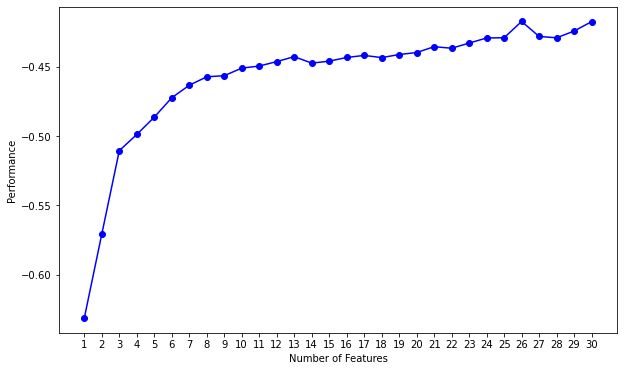

In [16]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(confidence_interval = 0.95),
                kind = 'std_err', figsize = (10, 6))
#plt.xticks(np.linspace(0,120,9))
#plt.ylim(0.98, 1.00)
#plt.xlim(30, 122)
plt.show()

# Training

MULTI-LAYER PERCEPTRON

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes = (60, 5),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 600)

In [62]:
model = Sequential()
model.add(Dense(240, input_dim = xtrain.shape[1], activation = 'sigmoid'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(120, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(loss = 'mae', optimizer = Adam(learning_rate = 0.0001))

early = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, 
                      verbose = 1, restore_best_weights = True)
history = model.fit(xtrain, ytrain, epochs = 100, batch_size = 16, validation_split = 0.2,
                   callbacks = early, verbose = 1)

Epoch 1/100
880/880 [==============================] - 2s 2ms/step - loss: 0.6262 - val_loss: 0.6361
Epoch 2/100
880/880 [==============================] - 2s 2ms/step - loss: 0.5424 - val_loss: 0.5787
Epoch 3/100
880/880 [==============================] - 2s 2ms/step - loss: 0.5197 - val_loss: 0.5661
Epoch 4/100
880/880 [==============================] - 1s 2ms/step - loss: 0.5116 - val_loss: 0.5566
Epoch 5/100
880/880 [==============================] - 2s 2ms/step - loss: 0.5056 - val_loss: 0.5500
Epoch 6/100
880/880 [==============================] - 2s 2ms/step - loss: 0.5041 - val_loss: 0.5635
Epoch 7/100
880/880 [==============================] - 2s 2ms/step - loss: 0.4983 - val_loss: 0.5492
Epoch 8/100
880/880 [==============================] - 2s 2ms/step - loss: 0.4992 - val_loss: 0.5470
Epoch 9/100
880/880 [==============================] - 2s 2ms/step - loss: 0.4942 - val_loss: 0.5517
Epoch 10/100
880/880 [==============================] - 1s 2ms/step - loss: 0.4950 - val_lo

In [58]:
model = Sequential()
model.add(Dense(60, input_dim = xtrain.shape[1], activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(30, activation = 'sigmoid'))
#model.add(Dropout(0.3))
#model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(loss = 'mae', optimizer = Adam(learning_rate = 0.001))

early = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, 
                      verbose = 1, restore_best_weights = True)
history = model.fit(xtrain, ytrain, epochs = 100, batch_size = 64, validation_split = 0.2,
                   callbacks = early, verbose = 1)


Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.7223 - val_loss: 0.6694
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5788 - val_loss: 0.6105
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5300 - val_loss: 0.5740
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5051 - val_loss: 0.5516
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4883 - val_loss: 0.5353
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4723 - val_loss: 0.5202
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4613 - val_loss: 0.5238
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4459 - val_loss: 0.5127
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4393 - val_loss: 0.5141
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4390 - val_loss: 0.5118
Epoch 11/

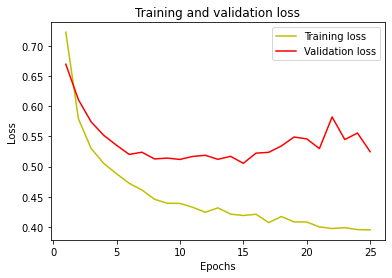

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing 

In [60]:
# Testing on the year 2017

#df3 = pd.DataFrame(df.iloc[44204:44662], columns = new_feat_WP)   # WP 2017
#df3 = pd.DataFrame(df.iloc[54960:55370], columns = new_feat_AL)   # AL 2017
df3 = pd.DataFrame(df.iloc[15729:15778], columns = feat_IO)   # IO 2017
#df3['dvs24'] = round(df3['dvs24'], 0)

#df3 = pd.DataFrame(pd.read_csv("NOAA_operational_vars_global_w_dvs24.csv"))  # operational AL 2010-16
#df3 = pd.DataFrame(df3, columns = new_feat_AL)
#df3 = df3.dropna(axis = 1)
#df3 = df3.drop(['E000_t24', 'V20C_t24'], axis = 1)

#df3 = pd.DataFrame(pd.read_csv("NOAA_operational_vars_global_w_dvs24.csv"))  # operational AL 2010-18
#df3 = pd.DataFrame(df3, columns = new_feat_AL)

#df3 = pd.DataFrame(pd.read_csv("atlantic_2019-20.csv"))  # operational AL 2019-20
#df3 = pd.DataFrame(df3, columns = new_feat_AL)
df3

,vs0,PSLV_v3,PSLV_v7,PSLV_v8,MTPW_v6,MTPW_v7,MTPW_v10,MTPW_v11,MTPW_v13,MTPW_v16,...,Z000_t24,TWXC_t24,V500_t24,V300_t24,SHDC_t24,SHGC_t24,SHRD_t24,CFLX_t24,DELV-12,dvs24
15729,25,41.0,30.0,43.0,567.0,96.0,494.0,141.0,36.0,559.0,...,-47.000000,146.000000,88.000000,18.000000,115.000000,268.000000,134.000000,127.000000,0.786585,5.004258
15730,25,38.0,28.0,46.0,560.0,104.0,465.0,145.0,40.0,551.0,...,-41.000000,156.000000,99.000000,20.000000,109.000000,360.000000,164.000000,149.000000,0.786585,10.008517
15731,25,40.0,40.0,51.0,554.0,111.0,449.0,144.0,50.0,545.0,...,-60.000000,198.000000,94.000000,20.000000,141.000000,418.000000,185.000000,182.000000,0.000000,15.012775
15732,25,38.0,39.0,43.0,540.0,125.0,444.0,135.0,59.0,540.0,...,-49.000000,208.000000,85.000000,32.000000,166.000000,394.000000,187.000000,201.000000,0.000000,20.017033
15733,30,38.0,42.0,40.0,498.0,133.0,432.0,140.0,74.0,512.0,...,-51.000000,196.000000,75.000000,22.000000,162.000000,375.000000,205.000000,213.000000,5.004258,20.017033
15734,35,45.0,46.0,50.0,494.0,133.0,418.0,127.0,82.0,500.0,...,-41.000000,190.000000,74.000000,12.000000,210.000000,426.000000,293.000000,165.000000,10.008517,15.012775
15735,40,47.0,47.0,49.0,478.0,137.0,430.0,125.0,98.0,482.0,...,-49.000000,186.000000,55.000000,-3.000000,256.000000,466.000000,337.000000,181.000000,10.008517,5.004258
15736,45,42.0,43.0,41.0,467.0,130.0,432.0,119.0,111.0,477.0,...,-26.000000,173.000000,53.000000,-31.000000,289.000000,463.000000,378.000000,280.000000,10.008517,-10.008517
15737,50,40.0,42.0,42.0,478.0,114.0,440.0,117.0,106.0,479.0,...,-26.000000,75.000000,36.000000,-44.000000,340.000000,493.000000,431.000000,305.000000,10.008517,-20.017033
15738,25,45.0,34.0,3.0,642.0,52.0,602.0,72.0,40.0,644.0,...,-79.000000,138.000000,81.000000,9.000000,172.000000,250.000000,138.000000,-27.000000,0.786585,10.008517


In [61]:
cols2 = list(df3)[:]
df_test = df3[cols2].astype(float)
df_test_scaled = scaler.fit_transform(df_test)
xtest, ytest  = df_test_scaled[:, :-1], df_test_scaled[:, -1]

In [62]:
print('\n')
model.evaluate(xtest, ytest)
predictions = model.predict(xtest)
predict_copies = np.repeat(predictions, df3.shape[1], axis = -1)
predictions2 = scaler.inverse_transform(predict_copies)[:, -1]
ytestdf = df3['dvs24']
ytest_arr = np.array(ytestdf)



2/2 [==============================] - 0s 3ms/step - loss: 0.3625


# Rapid Intensification analysis

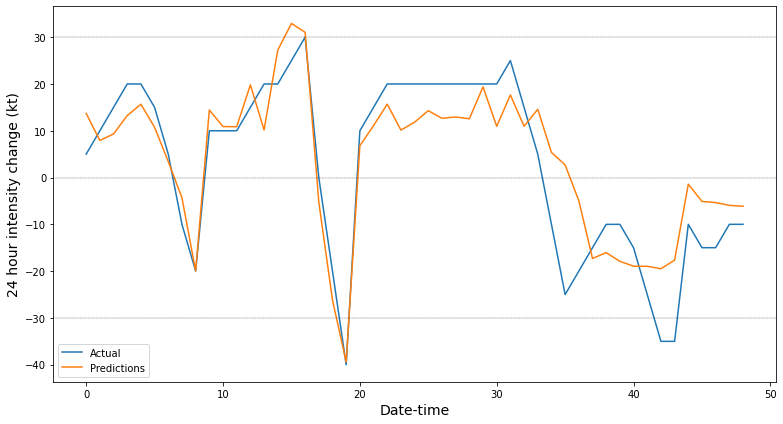

In [63]:
plt.figure(figsize = (11, 6))
plt.plot(ytest_arr, label = 'Actual')  # np.arange(0, len(ytest_arr), 1)
plt.plot(predictions2, label = 'Predictions')
plt.ylabel('24 hour intensity change (kt)', fontsize = 14)
plt.xlabel('Date-time', fontsize = 14)
plt.axhline(y=0, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=30, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=-30, color = 'black', linestyle='--', linewidth = 0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
total_ri, true_positives, false_positives, true_negatives, false_negatives = [],[],[],[],[]

for i, j in zip(range(len(ytest_arr)), range(len(predictions2))):
    if ytest_arr[i] >= 30:
        total_ri.append(ytest_arr[i])
        if predictions2[i] >= 30:
            true_positives.append(predictions2[i])
        else:
            false_negatives.append(predictions2[i])
    if ytest_arr[i] < 30:
        if predictions2[i] >= 30:
            false_positives.append(predictions2[i])
        else:
            true_negatives.append(predictions2[i])
            
accuracy = ((len(true_positives) + len(true_negatives)) / 
           (len(true_positives) + len(true_negatives) + 
            len(false_positives) + len(false_negatives)))

pod = len(true_positives) / (len(true_positives) + len(false_negatives))
far = len(false_positives) / (len(true_positives) + len(false_positives))
#pofd = len(false_positives) / (len(true_positives) + len(false_positives))
#pss = pod - pofd 
        
print('\nTotal RI cases:', len(total_ri))
print('True positives :', len(true_positives))
print('False positives:', len(false_positives))
print('True negatives :', len(true_negatives))
print('False negatives:', len(false_negatives))
print('POD:', pod)
print('FAR:', far)
print('\naccuracy:', accuracy)
#print('POFD:', pofd)
#print('PSS score:', pss)


Total RI cases: 1
True positives : 1
False positives: 1
True negatives : 47
False negatives: 0
POD: 1.0
FAR: 0.5

accuracy: 0.9795918367346939


In [65]:
# Metrics of testing evaluations

mae = np.sum(np.abs(predictions2 - ytest_arr)) / len(ytest_arr)
print('\nMAE:', np.round(mae, 2), 'kt')
rmse = np.sqrt(np.sum((predictions2 - ytest_arr) ** 2) / len(ytest_arr))
print('RMSE:', np.round(rmse, 2), 'kt')
r2 = round(r2_score(ytest_arr, predictions2), 3)
print('R^2 value:', r2)


MAE: 6.72 kt
RMSE: 8.36 kt
R^2 value: 0.796


# Regression stack model

LASSO REGRESSION

In [66]:
lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)
lasso_reg.fit(xtrain, ytrain)

Lasso(alpha=0.005, max_iter=10000, tol=0.003)

In [67]:
l_out = lasso_reg.predict(xtest)
lasso_pred = l_out.reshape((len(xtest), 1))
predict_copies_lasso = np.repeat(lasso_pred, df3.shape[1], axis = -1)
lasso_final = scaler.inverse_transform(predict_copies_lasso)[:, -1]
ytestdf = df3['dvs24']
ytest_arr = np.array(ytestdf)

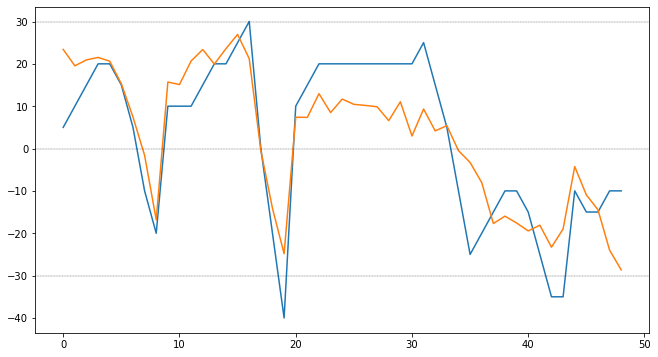

In [68]:
plt.figure(figsize = (11, 6))
plt.plot(ytest_arr)
plt.plot(lasso_final)
plt.axhline(y=0, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=30, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=-30, color = 'black', linestyle='--', linewidth = 0.3)
plt.show()

In [69]:
mae_lasso = np.sum(np.abs(lasso_final - ytest_arr)) / len(ytest_arr)
print('\nMAE:', np.round(mae_lasso, 2), 'kt')
rmse_lasso = np.sqrt(np.sum((lasso_final - ytest_arr) ** 2) / len(ytest_arr))
print('RMSE:', np.round(rmse_lasso, 2), 'kt')
r2_lasso = round(r2_score(ytest_arr, lasso_final), 3)
print('R^2 value:', r2_lasso)


MAE: 7.98 kt
RMSE: 9.63 kt
R^2 value: 0.73


RIDGE REGRESSION

In [70]:
ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)
ridge_reg.fit(xtrain, ytrain)

Ridge(alpha=100, max_iter=10000, tol=1e-10)

In [71]:
r_out = ridge_reg.predict(xtest)
ridge_pred = r_out.reshape((len(xtest), 1))
predict_copies_ridge = np.repeat(ridge_pred, df3.shape[1], axis = -1)
ridge_final = scaler.inverse_transform(predict_copies_ridge)[:, -1]
ytestdf = df3['dvs24']
ytest_arr = np.array(ytestdf)

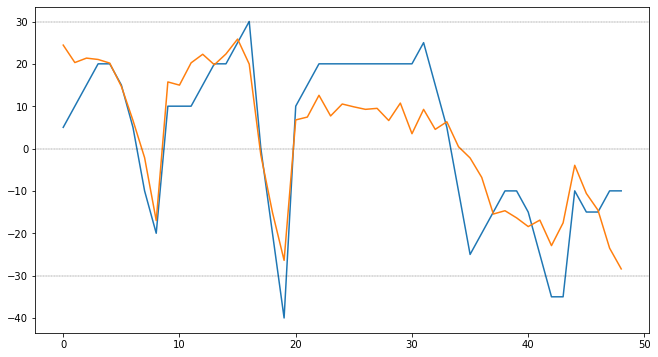

In [72]:
plt.figure(figsize = (11, 6))
plt.plot(ytest_arr)
plt.plot(ridge_final)
plt.axhline(y=0, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=30, color = 'black', linestyle='--', linewidth = 0.3)
plt.axhline(y=-30, color = 'black', linestyle='--', linewidth = 0.3)
plt.show()

In [73]:
mae_ridge = np.sum(np.abs(ridge_final - ytest_arr)) / len(ytest_arr)
print('\nMAE:', np.round(mae_ridge, 2), 'kt')
rmse_ridge = np.sqrt(np.sum((ridge_final - ytest_arr) ** 2) / len(ytest_arr))
print('RMSE:', np.round(rmse_ridge, 2), 'kt')
r2_ridge = round(r2_score(ytest_arr, ridge_final), 3)
print('R^2 value:', r2_ridge)


MAE: 8.0 kt
RMSE: 9.79 kt
R^2 value: 0.721


MULTI-LAYER PERCEPTRON BY SKLEARN

In [46]:
st = time.time()
mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 500)

mlp.fit(xtrain, ytrain)
en = time.time()
print('time:',(en-st)/60)

time: 0.2844269275665283


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
mlp_pred = mlp.predict(xtest)
test_pred_mlp = mlp_pred.reshape((len(xtest), 1))
predict_copies_mlp = np.repeat(test_pred_mlp, df3.shape[1], axis = -1)
predictions_mlp = scaler.inverse_transform(predict_copies_mlp)[:, -1]

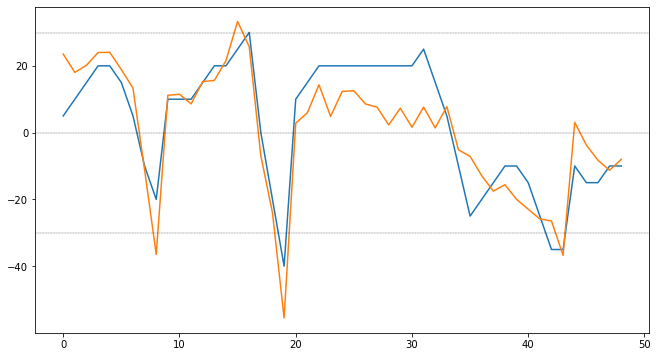

In [48]:
plt.figure(figsize = (11, 6))
plt.plot(ytest_arr)
plt.plot(predictions_mlp)
plt.axhline(y=0, color = 'black', linestyle= '--', linewidth = 0.3)
plt.axhline(y=30, color = 'black', linestyle= '--', linewidth = 0.3)
plt.axhline(y=-30, color = 'black', linestyle= '--', linewidth = 0.3)
plt.show()

In [49]:
mae_mlp = np.sum(np.abs(predictions_mlp - ytest_arr)) / len(ytest_arr)
print('\nMAE:', np.round(mae_mlp, 2), 'kt')
rmse_mlp = np.sqrt(np.sum((predictions_mlp - ytest_arr) ** 2) / len(ytest_arr))
print('RMSE:', np.round(rmse_mlp, 2), 'kt')
r2_mlp = round(r2_score(ytest_arr, predictions_mlp), 3)
print('R^2 value:', r2_mlp)


MAE: 7.74 kt
RMSE: 9.44 kt
R^2 value: 0.74


In [25]:
# 95% CONFIDENCE INTERVALS BASED ON T-DISTRIBUTION

start = time.time()

def stack(xtrain, ytrain):
    mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 500)

    #lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)

    #ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)

    #estimators = [('mlp', mlp), ('lasso', lasso_reg)]

    #stacked_model = StackingRegressor(estimators = estimators, final_estimator = ridge_reg)
    #stacked_model.fit(xtrain, ytrain)
    mlp.fit(xtrain, ytrain)
    return mlp
        
n_members, mae_sample, rmse_sample, r2_sample = 20, [], [], []
for i in range(n_members):
    model = stack(xtrain, ytrain)
    yhat = model.predict(xtest) 
    
    stack_pred = yhat.reshape((len(xtest), 1))
    predict_copies_stack = np.repeat(stack_pred, df3.shape[1], axis = -1)
    predictions_stack = scaler.inverse_transform(predict_copies_stack)[:, -1]
    
    mae = mean_absolute_error(ytest_arr, predictions_stack)
    mse = mean_squared_error(ytest_arr, predictions_stack)
    rmse = math.sqrt(mse)
    r2 = r2_score(ytest_arr, predictions_stack)
    mae_sample.append(mae)
    rmse_sample.append(rmse)
    r2_sample.append(r2)
    print('>%d, MAE: %.3f' % (i+1, mae), 'RMSE:', round(rmse, 3), 'R^2:', round(r2, 3))
    
mae_array, rmse_array, r2_array = np.asarray(mae_sample), np.asarray(rmse_sample), np.asarray(r2_sample)
mae_mean, rmse_mean, r2_mean = mae_array.mean(), rmse_array.mean(), r2_array.mean()
mae_std, rmse_std, r2_std = mae_array.std(), rmse_array.std(), r2_array.std()
mae_interval, rmse_interval, r2_interval = 0.468 * mae_std, 0.468 * rmse_std, 0.468 * r2_std
mae_lower, mae_upper = mae_array.mean() - mae_interval, mae_array.mean() + mae_interval
rmse_lower, rmse_upper = rmse_array.mean() - rmse_interval, rmse_array.mean() + rmse_interval
r2_lower, r2_upper = r2_array.mean() - r2_interval, r2_array.mean() + r2_interval

print('\n')
print('MAE mean:', round(mae_mean, 3), 'RMSE mean:', round(rmse_mean, 3), 'R^2 mean:', round(r2_mean, 3))
print('MAE std:', round(mae_std, 3), 'RMSE std:', round(rmse_std, 3), 'R^2 std:', round(r2_std, 3))
print('95%% MAE confidence interval: [%.3f, %.3f]' % (mae_lower, mae_upper))
print('95%% RMSE confidence interval: [%.3f, %.3f]' % (rmse_lower, rmse_upper))
print('95%% R^2 confidence interval: [%.3f, %.3f]' % (r2_lower, r2_upper))

end = time.time()
print('\n', "Time elapsed:", (end - start)/60, 'min')

>1, MAE: 9.419 RMSE: 12.525 R^2: 0.629
>2, MAE: 8.809 RMSE: 11.828 R^2: 0.669
>3, MAE: 9.541 RMSE: 12.21 R^2: 0.647
>4, MAE: 9.069 RMSE: 11.969 R^2: 0.661
>5, MAE: 8.940 RMSE: 11.938 R^2: 0.663
>6, MAE: 9.131 RMSE: 12.159 R^2: 0.65
>7, MAE: 8.987 RMSE: 12.029 R^2: 0.657
>8, MAE: 9.184 RMSE: 12.055 R^2: 0.656
>9, MAE: 9.842 RMSE: 12.871 R^2: 0.608
>10, MAE: 8.833 RMSE: 11.709 R^2: 0.675
>11, MAE: 8.590 RMSE: 11.346 R^2: 0.695
>12, MAE: 9.469 RMSE: 12.378 R^2: 0.637
>13, MAE: 8.925 RMSE: 11.921 R^2: 0.663
>14, MAE: 8.929 RMSE: 12.047 R^2: 0.656
>15, MAE: 8.826 RMSE: 11.876 R^2: 0.666
>16, MAE: 9.130 RMSE: 12.396 R^2: 0.636
>17, MAE: 9.084 RMSE: 12.008 R^2: 0.659
>18, MAE: 9.472 RMSE: 12.684 R^2: 0.619
>19, MAE: 8.900 RMSE: 11.989 R^2: 0.66
>20, MAE: 9.256 RMSE: 12.1 R^2: 0.653


MAE mean: 9.117 RMSE mean: 12.102 R^2 mean: 0.653
MAE std: 0.298 RMSE std: 0.335 R^2 std: 0.019
95% MAE confidence interval: [8.977, 9.256]
95% RMSE confidence interval: [11.945, 12.259]
95% R^2 confidence interv

In [31]:
total_ri, true_positives, false_positives, true_negatives, false_negatives = [],[],[],[],[]

for i, j in zip(range(len(ytest_arr)), range(len(predictions_mlp))):
    if ytest_arr[i] >= 30:
        total_ri.append(ytest_arr[i])
        if predictions_mlp[i] >= 30:
            true_positives.append(predictions_mlp[i])
        else:
            false_negatives.append(predictions_mlp[i])
    if ytest_arr[i] < 30:
        if predictions_mlp[i] >= 30:
            false_positives.append(predictions_mlp[i])
        else:
            true_negatives.append(predictions_mlp[i])
            
accuracy = ((len(true_positives) + len(true_negatives)) / 
           (len(true_positives) + len(true_negatives) + 
            len(false_positives) + len(false_negatives)))

pod = len(true_positives) / (len(true_positives) + len(false_negatives))
far = len(false_positives) / (len(true_positives) + len(false_positives))
#pofd = len(false_positives) / (len(true_positives) + len(false_positives))
#pss = pod - pofd 
        
print('\nTotal RI cases:', len(total_ri))
print('True positives :', len(true_positives))
print('False positives:', len(false_positives))
print('True negatives :', len(true_negatives))
print('False negatives:', len(false_negatives))
print('POD:', pod)
print('FAR:', far)
print('\naccuracy:', accuracy)
#print('POFD:', pofd)
#print('PSS score:', pss)


Total RI cases: 44
True positives : 11
False positives: 1
True negatives : 365
False negatives: 33
POD: 0.25
FAR: 0.08333333333333333

accuracy: 0.9170731707317074


In [74]:
# STACKED REGRESSION MODEL !!!
    
st = time.time()

mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 500)

lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)

ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)

#reg_nn_model = KerasRegressor(model = regression_model,
#                                  epochs = 100, 
#                                  batch_size = 64,
#                                  validation_split = 0.2,
#                                  verbose = 0)

estimators = [('mlp', mlp), ('lasso', lasso_reg)]

stacked_model = StackingRegressor(estimators = estimators, final_estimator = ridge_reg)
stacked_model.fit(xtrain, ytrain)

en = time.time()
print('time:', (en-st)/60, 'min')

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


time: 0.6839191635449727 min


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
test_pred = stacked_model.predict(xtest)
test_pred2 = test_pred.reshape((len(xtest), 1))
predict_copies2 = np.repeat(test_pred2, df3.shape[1], axis = -1)
predictions3 = scaler.inverse_transform(predict_copies2)[:, -1]

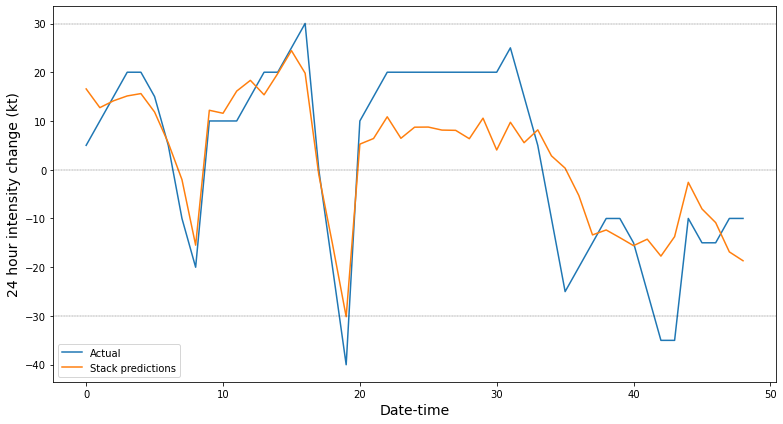

In [76]:
plt.figure(figsize = (11, 6))
plt.plot(ytest_arr, label = 'Actual')  # np.arange(0, len(ytest_arr), 1)
#plt.plot(predictions2, label = 'NN predictions')
plt.plot(predictions3, label = 'Stack predictions')
plt.ylabel('24 hour intensity change (kt)', fontsize = 14)
plt.xlabel('Date-time', fontsize = 14)
plt.axhline(y=0, color = 'black', linestyle ='--', linewidth = 0.3)
plt.axhline(y=30, color = 'black', linestyle ='--', linewidth = 0.3)
plt.axhline(y=-30, color = 'black', linestyle ='--', linewidth = 0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
mae_stack = np.sum(np.abs(predictions3 - ytest_arr)) / len(ytest_arr)
print('\nMAE:', np.round(mae_stack, 2), 'kt')
rmse_stack = np.sqrt(np.sum((predictions3 - ytest_arr) ** 2) / len(ytest_arr))
print('RMSE:', np.round(rmse_stack, 2), 'kt')
r2_stack = round(r2_score(ytest_arr, predictions3), 3)
print('R^2 value:', r2_stack)


MAE: 7.74 kt
RMSE: 9.59 kt
R^2 value: 0.732


In [78]:
start = time.time()

def stack(xtrain, ytrain):
    mlp = MLPRegressor(hidden_layer_sizes = (60, 15),
                   activation = 'logistic',
                   solver = 'sgd',
                   alpha = 0.0001, 
                   batch_size = 32,
                   early_stopping = True,
                   verbose = False,
                   max_iter = 500)

    lasso_reg = Lasso(alpha = 0.005, tol = 0.003, max_iter = 10000)

    ridge_reg = Ridge(alpha = 100, tol = 1e-10, max_iter = 10000)

    estimators = [('mlp', mlp), ('lasso', lasso_reg)]

    stacked_model = StackingRegressor(estimators = estimators, final_estimator = ridge_reg)
    stacked_model.fit(xtrain, ytrain)
    return stacked_model
        
n_members, mae_sample, rmse_sample, r2_sample = 20, [], [], []
for i in range(n_members):
    model = stack(xtrain, ytrain)
    yhat = model.predict(xtest) 
    
    stack_pred = yhat.reshape((len(xtest), 1))
    predict_copies_stack = np.repeat(stack_pred, df3.shape[1], axis = -1)
    predictions_stack = scaler.inverse_transform(predict_copies_stack)[:, -1]
    
    mae = mean_absolute_error(ytest_arr, predictions_stack)
    mse = mean_squared_error(ytest_arr, predictions_stack)
    rmse = math.sqrt(mse)
    r2 = r2_score(ytest_arr, predictions_stack)
    mae_sample.append(mae)
    rmse_sample.append(rmse)
    r2_sample.append(r2)
    print('>%d, MAE: %.3f' % (i+1, mae), 'RMSE:', round(rmse, 3), 'R^2:', round(r2, 3))
    
mae_array, rmse_array, r2_array = np.asarray(mae_sample), np.asarray(rmse_sample), np.asarray(r2_sample)
mae_mean, rmse_mean, r2_mean = mae_array.mean(), rmse_array.mean(), r2_array.mean()
mae_std, rmse_std, r2_std = mae_array.std(), rmse_array.std(), r2_array.std()
mae_interval, rmse_interval, r2_interval = 0.468 * mae_std, 0.468 * rmse_std, 0.468 * r2_std
mae_lower, mae_upper = mae_array.mean() - mae_interval, mae_array.mean() + mae_interval
rmse_lower, rmse_upper = rmse_array.mean() - rmse_interval, rmse_array.mean() + rmse_interval
r2_lower, r2_upper = r2_array.mean() - r2_interval, r2_array.mean() + r2_interval

print('\n')
print('MAE mean:', round(mae_mean, 3), 'RMSE mean:', round(rmse_mean, 3), 'R^2 mean:', round(r2_mean, 3))
print('MAE std:', round(mae_std, 3), 'RMSE std:', round(rmse_std, 3), 'R^2 std:', round(r2_std, 3))
print('95%% MAE confidence interval: [%.3f, %.3f]' % (mae_lower, mae_upper))
print('95%% RMSE confidence interval: [%.3f, %.3f]' % (rmse_lower, rmse_upper))
print('95%% R^2 confidence interval: [%.3f, %.3f]' % (r2_lower, r2_upper))

end = time.time()
print('\n', "Time elapsed:", (end - start)/60, 'min')

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>1, MAE: 7.779 RMSE: 9.851 R^2: 0.717


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>2, MAE: 7.993 RMSE: 9.757 R^2: 0.723


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>3, MAE: 7.765 RMSE: 9.701 R^2: 0.726


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>4, MAE: 8.057 RMSE: 9.764 R^2: 0.722


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>5, MAE: 8.115 RMSE: 9.841 R^2: 0.718


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>6, MAE: 7.642 RMSE: 9.7 R^2: 0.726


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>7, MAE: 7.832 RMSE: 9.908 R^2: 0.714


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>8, MAE: 7.690 RMSE: 9.659 R^2: 0.728


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>9, MAE: 8.115 RMSE: 9.851 R^2: 0.718


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>10, MAE: 8.192 RMSE: 9.944 R^2: 0.712


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>11, MAE: 8.005 RMSE: 9.726 R^2: 0.725


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multi

>12, MAE: 7.793 RMSE: 9.799 R^2: 0.72


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>13, MAE: 8.091 RMSE: 9.841 R^2: 0.718


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>14, MAE: 7.539 RMSE: 9.468 R^2: 0.739


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>15, MAE: 7.768 RMSE: 9.716 R^2: 0.725


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>16, MAE: 7.860 RMSE: 9.911 R^2: 0.714


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>17, MAE: 7.893 RMSE: 9.665 R^2: 0.728


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>18, MAE: 7.932 RMSE: 9.617 R^2: 0.731
>19, MAE: 8.066 RMSE: 9.831 R^2: 0.719


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


>20, MAE: 8.068 RMSE: 9.869 R^2: 0.716


MAE mean: 7.91 RMSE mean: 9.771 R^2 mean: 0.722
MAE std: 0.176 RMSE std: 0.114 R^2 std: 0.006
95% MAE confidence interval: [7.827, 7.992]
95% RMSE confidence interval: [9.718, 9.824]
95% R^2 confidence interval: [0.719, 0.725]

 Time elapsed: 11.726311802864075 min
